In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

[5 0 4 ... 5 6 8]


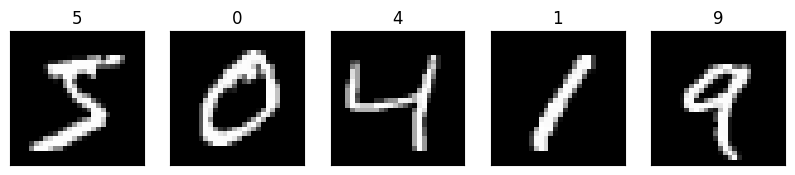

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(y_train)
fig, axes = plt.subplots(ncols=5, sharex=False,
    sharey=True, figsize=(10, 4))

for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [ ]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

temp = []
print(y_train.shape)
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
print(y_train.shape)
print(y_train)

# temp = []
# for i in range(len(y_test)):
#     temp.append(to_categorical(y_test[i], num_classes=10))
# y_test = np.array(temp)
# print(x_train.shape)

(60000,)
(60000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
def init_weights():
    w1 = np.random.randn(784,10) -0.5
    b1 = np.zeros((1,10))-0.5
    w2 = np.random.randn(10, 10) -0.5
    b2 = np.zeros((1,10))-0.5
    return w1, b1, w2, b2

w1,b1,w2,b2=init_weights()

In [ ]:
def sigmoid(function):
  return 1/(1+ np.e ** -function)

def sigmoid_deriv(function):
  sigmoid_x = 1 / (1 + np.exp(-function))
  return sigmoid_x * (1 - sigmoid_x)

def ReLU(z):
  return np.maximum(0,z)

def ReLUPrime(z):
  a=ReLU(z)
  return a>0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y

def softmax(function):
  return np.exp(function)/np.sum(np.exp(function))

def forward_prop(x_train,w1,b1,w2,b2):
    z1 = np.dot(x_train, w1) + b1
    a1 = ReLU(z1)
    z2 = np.dot(a1, w2) + b2
    a2 = ReLU(z2)
    return z1, a1, z2, a2

z1,output_layer1,z2,output_layer2=forward_prop(x_train,w1,b1,w2,b2)

In [ ]:
def backward_prop(x_train, y_train,a1,a2,z1,z2,w1,b1,w2,b2,learning_rate=0.1):
    m = x_train.shape[0]
    delta2 = a2 - y_train
    dw2 = np.dot(a1.T, delta2)
    db2 = np.sum(delta2)
    delta1 = np.dot(delta2,w2.T) * ReLUPrime(z1)
    dw1 = np.dot(x_train.T, delta1)
    db1 = np.sum(delta1)
    w2 += learning_rate * dw2
    b2 += learning_rate * db2
    w1 += learning_rate * dw1
    b1 += learning_rate * db1
    return w1, b1, w2, b2

In [ ]:
def get_predictions(output):
    return np.argmax(output, 0)

for epoch in range(20):
      z1,output_layer1,z2,output_layer2 = forward_prop(x_train, w1, b1, w2, b2)
      w1, b1, w2, b2 = backward_prop(x_train,y_train,output_layer1,output_layer2,z1,z2,w1,b1,w2,b2)
      prediction=get_predictions(output_layer2)
      accuracy = np.sum(y_train == prediction)/y_train.sum()
      print("accuracy:  ", accuracy)
      # print(epoch)

accuracy:   4.5115
accuracy:   4.5115
accuracy:   4.5115
accuracy:   4.5115
accuracy:   9.0
accuracy:   9.0
accuracy:   9.0
accuracy:   9.0
accuracy:   9.0
accuracy:   9.0
accuracy:   9.0
accuracy:   9.0
accuracy:   9.0
accuracy:   9.0
accuracy:   9.0
accuracy:   9.0
accuracy:   9.0
accuracy:   9.0
accuracy:   9.0
accuracy:   9.0
